In [29]:
#import os
import numpy as np
import pandas as pd
import tensorflow as tf
from numpy import loadtxt
import tensorflow.keras as k
from tensorflow.keras import layers as l
import matplotlib.pyplot as plt

In [30]:
path= "/Users/shahrasm/Documents/Graduation_project/"
modelpath=path+"bestmodel"
col=range(71)

train_data = pd.read_csv(path+'train_data.csv',names=col)#, delimiter=',')
Xtr = train_data.loc[:,1:71]
ytr = train_data.loc[:,0]

In [31]:
test_data = pd.read_csv(path+'test_data.csv',names=col)
Xts = test_data.loc[:,1:71]
yts = test_data.loc[:,0]

In [32]:
tr=[]
for c in range(1,71):
    e=Xtr[c]
    meanc=np.mean(e) 
    varc=np.var(e) 
    normalize=l.Normalization(mean=meanc,variance=varc)
    e=normalize(e)
    tr.append(e)


In [33]:
ts=[]
for c in range(1,71):
    e=Xts[c]
    meanc=np.mean(e) 
    varc=np.var(e) 
    normalize=l.Normalization(mean=meanc,variance=varc)
    e=normalize(e)
    ts.append(e)

In [34]:
Xtr=np.array(tr)
Xtr=np.transpose(Xtr)
Xts=np.array(ts)
Xts=np.transpose(Xts)

In [35]:
reg12=tf.keras.regularizers.l1_l2()
reg12=tf.keras.regularizers.l2()
#callback=k.callbacks.EarlyStopping(monitor="val_binary_accuracy", baseline=79., patience=250, verbose=1, restore_best_weights=True)
callback=k.callbacks.ModelCheckpoint(filepath=modelpath,save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)

In [36]:
myins = []
for c in range(1,71):
    d=l.Input(shape=(1,), dtype=tf.float32) 
    myins.append(d) 

In [37]:
r0=l.Lambda(lambda x:l.concatenate(x))(myins)
r=l.Reshape((1,70))(r0)


In [50]:
Project=l.Dense(1024, activation='linear',activity_regularizer=reg12)    

key=Project(r)
val=Project(r)
query=Project(r)
vk=l.Attention()([key,val])
vkq=l.Concatenate()([vk,query])

r=l.Dropout(0.25)(vkq)

fc=l.Dense(512, activation='linear',activity_regularizer=reg12)(r)
fc=l.Dropout(0.25)(fc)
fc=l.Dense(128, activation='linear',activity_regularizer=reg12)(fc)
fc=l.Dropout(0.25)(fc)
fc=l.Dense(64, activation='linear',activity_regularizer=reg12)(fc)
fc=l.Dropout(0.25)(fc)
pre=l.Dense(1, activation='sigmoid',activity_regularizer=reg12)(fc)
model = k.Model(inputs=r0, outputs=pre)


In [51]:
opt=k.optimizers.Adam(lr=1e-6)
#metric= [k.metrics.BinaryAccuracy()]  
model.compile(loss='binary_crossentropy',  optimizer=opt  , metrics='accuracy')
history=model.fit(Xtr, ytr, validation_split=0.10, epochs=150, batch_size=64)

Epoch 1/150
6/6 [==============================] - 4s 216ms/step - loss: 18.7858 - accuracy: 0.5014 - val_loss: 9.2718 - val_accuracy: 0.3846
Epoch 2/150
6/6 [==============================] - 0s 81ms/step - loss: 18.8768 - accuracy: 0.4640 - val_loss: 9.2501 - val_accuracy: 0.3846
Epoch 3/150
6/6 [==============================] - 0s 82ms/step - loss: 18.7832 - accuracy: 0.4582 - val_loss: 9.2295 - val_accuracy: 0.3846
Epoch 4/150
6/6 [==============================] - 0s 79ms/step - loss: 18.7879 - accuracy: 0.4524 - val_loss: 9.2097 - val_accuracy: 0.3846
Epoch 5/150
6/6 [==============================] - 0s 83ms/step - loss: 18.5589 - accuracy: 0.5187 - val_loss: 9.1896 - val_accuracy: 0.3846
Epoch 6/150
6/6 [==============================] - 0s 81ms/step - loss: 18.7890 - accuracy: 0.4813 - val_loss: 9.1693 - val_accuracy: 0.3846
Epoch 7/150
6/6 [==============================] - 0s 81ms/step - loss: 18.5733 - accuracy: 0.4957 - val_loss: 9.1495 - val_accuracy: 0.3846
Epoch 8/150


Epoch 59/150
6/6 [==============================] - 0s 78ms/step - loss: 17.4655 - accuracy: 0.5994 - val_loss: 8.4025 - val_accuracy: 0.5897
Epoch 60/150
6/6 [==============================] - 0s 77ms/step - loss: 17.3758 - accuracy: 0.5735 - val_loss: 8.3902 - val_accuracy: 0.5897
Epoch 61/150
6/6 [==============================] - 0s 84ms/step - loss: 17.4957 - accuracy: 0.5303 - val_loss: 8.3784 - val_accuracy: 0.5641
Epoch 62/150
6/6 [==============================] - 0s 79ms/step - loss: 17.5166 - accuracy: 0.5879 - val_loss: 8.3670 - val_accuracy: 0.5897
Epoch 63/150
6/6 [==============================] - 0s 79ms/step - loss: 17.2324 - accuracy: 0.5418 - val_loss: 8.3550 - val_accuracy: 0.5897
Epoch 64/150
6/6 [==============================] - 0s 79ms/step - loss: 17.2866 - accuracy: 0.5994 - val_loss: 8.3433 - val_accuracy: 0.6154
Epoch 65/150
6/6 [==============================] - 0s 79ms/step - loss: 17.2676 - accuracy: 0.5648 - val_loss: 8.3318 - val_accuracy: 0.6410
Epoch 

6/6 [==============================] - 0s 76ms/step - loss: 16.4000 - accuracy: 0.6571 - val_loss: 7.8253 - val_accuracy: 0.6667
Epoch 117/150
6/6 [==============================] - 0s 77ms/step - loss: 16.2449 - accuracy: 0.5994 - val_loss: 7.8167 - val_accuracy: 0.6667
Epoch 118/150
6/6 [==============================] - 0s 77ms/step - loss: 16.3521 - accuracy: 0.6398 - val_loss: 7.8082 - val_accuracy: 0.6667
Epoch 119/150
6/6 [==============================] - 0s 76ms/step - loss: 16.2664 - accuracy: 0.6715 - val_loss: 7.8000 - val_accuracy: 0.6667
Epoch 120/150
6/6 [==============================] - 0s 75ms/step - loss: 16.2932 - accuracy: 0.6081 - val_loss: 7.7915 - val_accuracy: 0.6667
Epoch 121/150
6/6 [==============================] - 0s 85ms/step - loss: 16.2778 - accuracy: 0.6427 - val_loss: 7.7826 - val_accuracy: 0.6667
Epoch 122/150
6/6 [==============================] - 1s 95ms/step - loss: 16.1618 - accuracy: 0.6599 - val_loss: 7.7733 - val_accuracy: 0.6667
Epoch 123/150

In [52]:
_,accuracy = model.evaluate(Xtr,ytr)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 14ms/step - loss: 8.0191 - accuracy: 0.7953
Accuracy: 79.53


In [53]:
_,accuracy = model.evaluate(Xts,yts)
print('Accuracy: %.2f' % (accuracy*100))

6/6 [==============================] - 0s 14ms/step - loss: 8.5379 - accuracy: 0.7289
Accuracy: 72.89


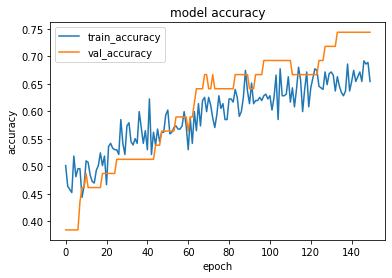

In [54]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc = 'upper left')
plt.show()


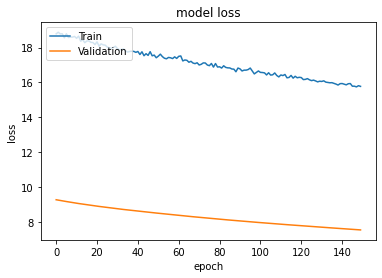

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
predictions = (model.predict(Xts) > 0.5).astype("int32")
for i in range(55):
	print('%s => %d (expected %d)' % (Xts[i].tolist(), predictions[i], yts[i]))